In [17]:
# 'On the Origin of Species (sixth edition)' html: http://www.gutenberg.org/files/2009/2009-h/2009-h.htm

# 'The Descent of Man': http://www.gutenberg.org/cache/epub/2300/pg2300.html

# 'The Expression of the Emotions in Man and Animals': http://www.gutenberg.org/files/1227/1227-h/1227-h.htm


# Importing requests, BeautifulSoup and nltk
import requests
from bs4 import BeautifulSoup
import nltk

In [18]:
# get the html for all three books from Project Gutenberg website

origin = requests.get('http://www.gutenberg.org/files/2009/2009-h/2009-h.htm')
descent = requests.get('http://www.gutenberg.org/cache/epub/2300/pg2300.html')
emotions = requests.get('http://www.gutenberg.org/files/1227/1227-h/1227-h.htm')

In [19]:
# Setting the correct text encoding of the HTML page for origin 
origin.encoding = 'utf-8'

# Extracting the HTML from the request object
origin_html = origin.text

# Creating a BeautifulSoup object from the origin HTML
origin_soup = BeautifulSoup(origin_html, 'html.parser')

# Getting the text out of the origin soup
origin_text = origin_soup.get_text()



# TOKENIZATION WITH NLTK COMMENTED OUT BECAUSE IT IS NOT NECESSARY IF USING sci-kit learn 

# Creating a tokenizer
# tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenizing the origin text
# origin_tokens = tokenizer.tokenize(origin_text)

In [20]:
[type(origin.encoding), type(origin_html), type(origin_soup), type(origin_text)]

[str, str, bs4.BeautifulSoup, str]

In [21]:
origin_text[:100]

'\n\n\n\n\n      The Origin of Species, Sixth Edition by Charles Darwin\n    \n\n    \n    body { margin:5%; b'

In [22]:
# Setting the correct text encoding of the HTML page for descent
descent.encoding = 'utf-8'

# Extracting the HTML from the request object
descent_html = descent.text

# Creating a BeautifulSoup object from the descent HTML
descent_soup = BeautifulSoup(descent_html, 'html.parser')

# Getting the text out of the descent soup
descent_text = descent_soup.get_text()

# Tokenizing the descent text
# descent_tokens = tokenizer.tokenize(descent_text)

In [23]:
# Setting the correct text encoding of the HTML page for emotions
emotions.encoding = 'utf-8'

# Extracting the HTML from the request object
emotions_html = emotions.text

# Creating a BeautifulSoup object from the emotions HTML
emotions_soup = BeautifulSoup(emotions_html, 'html.parser')

# Getting the text out of the emotions soup
emotions_text = emotions_soup.get_text()

# Tokenizing the emotions text
# emotions_tokens = tokenizer.tokenize(emotions_text)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words('english')

In [25]:
# make a single list containing all three texts (untokenized) books that will be treated as a corpus for tf-idf

darwin_corpus = [origin_text, descent_text, emotions_text]

In [26]:
# instantiate the TfidfVectorizer allowing for ngrams of 1, 2 and 3 words in length to be used as features

vectorizer = TfidfVectorizer(stop_words=stopwords, use_idf=True, ngram_range=(1,3))


# fit the TfidfVectorizer to darwin_corpus and then generate document-term sparse matrix ('X') with Tf-idf scores

X = vectorizer.fit_transform(darwin_corpus)

In [27]:
# X is 3 x 552738 matrix (3 books --the rows-- in corpus and 552738 tokens/features/words --the columns-- extracted from corpus)

X.shape

(3, 552738)

In [28]:
X[0]

<1x552738 sparse matrix of type '<class 'numpy.float64'>'
	with 189860 stored elements in Compressed Sparse Row format>

In [29]:
print(X[0])

  (0, 361095)	0.0191015987011
  (0, 466036)	0.460826068665
  (0, 456387)	0.00238769983764
  (0, 156569)	0.00429785970776
  (0, 93249)	0.00358154975646
  (0, 126948)	0.00191015987011
  (0, 69202)	0.0157588189284
  (0, 308544)	0.00716309951293
  (0, 53776)	0.000614919655066
  (0, 183970)	0.000404272724813
  (0, 496122)	0.00214892985388
  (0, 27345)	0.00215221879273
  (0, 269083)	0.000716309951293
  (0, 252614)	0.000614919655066
  (0, 6223)	0.000307459827533
  (0, 506312)	0.00143261990259
  (0, 7310)	0.000614919655066
  (0, 70965)	0.00310400978894
  (0, 228837)	0.000307459827533
  (0, 228840)	0.000307459827533
  (0, 228843)	0.000307459827533
  (0, 228846)	0.000307459827533
  (0, 228849)	0.000307459827533
  (0, 228852)	0.000307459827533
  (0, 87206)	0.000922379482599
  :	:
  (0, 533792)	0.000238769983764
  (0, 456063)	0.000238769983764
  (0, 296133)	0.000238769983764
  (0, 377157)	0.000238769983764
  (0, 433768)	0.000404272724813
  (0, 182509)	0.000404272724813
  (0, 228752)	0.000238769983

In [30]:
# feature names of tokens are stored in TfidfVectorizer object 

vectorizer.get_feature_names()

['000',
 '000 000',
 '000 000 soldiers',
 '000 15',
 '000 15 000',
 '000 according',
 '000 according loose',
 '000 feet',
 '000 feet deeply',
 '000 feet informs',
 '000 feet professor',
 '000 feet solid',
 '000 feet valleys',
 '000 feet yet',
 '000 number',
 '000 number soon',
 '000 padding',
 '000 padding 5em',
 '000 particularly',
 '000 particularly important',
 '000 pieces',
 '000 pieces shell',
 '000 pigeons',
 '000 pigeons taken',
 '000 soldiers',
 '000 soldiers served',
 '000 specimens',
 '000 specimens apus',
 '000 years',
 '000 years ago',
 '000 years respect',
 '019',
 '019 81',
 '019 81 1860',
 '050',
 '050 1832',
 '050 1832 several',
 '071',
 '071 males',
 '071 males 25',
 '08',
 '08 100',
 '08 100 time',
 '084',
 '084 18',
 '084 18 1866',
 '09',
 '09 inch',
 '09 inch therefore',
 '10',
 '10 000',
 '10 000 15',
 '10 100',
 '10 100 plants',
 '10 12',
 '10 12 35',
 '10 1857',
 '10 1857 regard',
 '10 1868',
 '10 1868 724',
 '10 1869',
 '10 1869 lately',
 '10 773',
 '10 773 fema

In [31]:
X.shape

(3, 552738)

In [32]:
# need to convert sparse document-term matrix 'X' to an numpy array to allow it to be put into pandas df
# this can be done on-the-fly below when making the dataframe.  Just showing it explicitly here with type()

X_arr = X.toarray()

type(X_arr)

numpy.ndarray

In [33]:
# generate a pandas dataframe from the doc-term matrix containing the docs and features with the Tf-idf scores are the entries 

import pandas as pd

darwin_corpus_tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [34]:
darwin_corpus_tfidf_df.head()

,000,000 000,000 000 soldiers,000 15,000 15 000,000 according,000 according loose,000 feet,000 feet deeply,000 feet informs,...,über das darwin,über das langenwachsthum,über den,über den vogelschwanz,über die,über die darwin,über die entstehung,über die heuschrecken,über die knochernen,über die richtung
0,0.002388,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001537,0.000404,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.001552,0.000292,0.000292,0.000292,0.000292,0.000292,0.000292,0.000222,0.000000,0.000292,...,0.000292,0.000292,0.000292,0.000292,0.001752,0.000292,0.000292,0.000292,0.000292,0.000584
2,0.000995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [35]:
# transposed dataframe is now the term-document matrix 

darwin_corpus_tfidf_df.transpose().head(20)

,0,1,2
000,0.002388,0.001552,0.000995
000 000,0.000000,0.000292,0.000000
000 000 soldiers,0.000000,0.000292,0.000000
000 15,0.000000,0.000292,0.000000
000 15 000,0.000000,0.000292,0.000000
000 according,0.000000,0.000292,0.000000
000 according loose,0.000000,0.000292,0.000000
000 feet,0.001537,0.000222,0.000000
000 feet deeply,0.000404,0.000000,0.000000
000 feet informs,0.000000,0.000292,0.000000


In [36]:
darwin_corpus_tfidf_df.transpose().tail(20)

,0,1,2
étalons qui,0.0,0.000292,0.0
étalons qui eprennent,0.0,0.000292,0.0
étant,0.0,0.000292,0.0
étant plus,0.0,0.000292,0.0
étant plus terne,0.0,0.000292,0.0
études,0.0,0.000876,0.0
études sur,0.0,0.000876,0.0
études sur les,0.0,0.000876,0.0
über,0.0,0.002628,0.0
über das,0.0,0.000584,0.0


In [37]:
# top 20 tf-idf scores for 'On the Origin of Species' 

darwin_corpus_tfidf_df.transpose()[0].sort_values(ascending=False)[:20]

species              0.460826
one                  0.193642
would                0.167855
may                  0.161886
many                 0.147321
forms                0.134905
selection            0.133950
natural              0.127742
varieties            0.116042
two                  0.112699
plants               0.112461
animals              0.104104
natural selection    0.097418
thus                 0.093359
several              0.087867
different            0.087390
great                0.086435
distinct             0.085718
life                 0.083808
case                 0.081898
Name: 0, dtype: float64

In [38]:
topNTerms_Origin = darwin_corpus_tfidf_df.transpose()[0].sort_values(ascending=False)[:20]
topNTerms_Origin = topNTerms_Origin.to_dict()

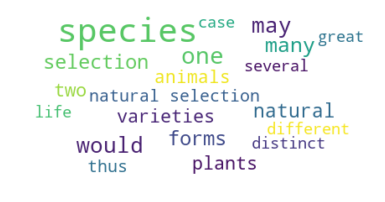

In [39]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud( background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42)
wordcloud.generate_from_frequencies(topNTerms_Origin)

# Display the generated image:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() 

In [40]:
# top 20 tf-idf scores for 'The Descent of Man' 

darwin_corpus_tfidf_df.transpose()[1].sort_values(ascending=False)[:20]

male         0.274739
males        0.219722
man          0.210927
female       0.197992
species      0.189713
sexes        0.180400
females      0.170225
one          0.163843
birds        0.160739
mr           0.155392
would        0.150046
many         0.130902
sexual       0.126590
may          0.122624
animals      0.115380
selection    0.107102
young        0.096926
two          0.096754
vol          0.094339
much         0.093994
Name: 1, dtype: float64

In [41]:
topNTerms_Descent = darwin_corpus_tfidf_df.transpose()[1].sort_values(ascending=False)[:20]
topNTerms_Descent = topNTerms_Descent.to_dict()

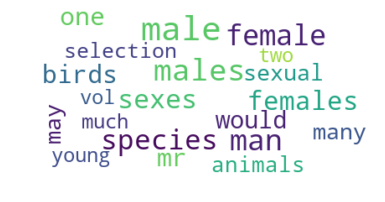

In [42]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud( background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42)
wordcloud.generate_from_frequencies(topNTerms_Descent)

# Display the generated image:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() 

In [43]:
# top 20 tf-idf scores for 'The Expression of the Emotions in Man and Animal' 

darwin_corpus_tfidf_df.transpose()[2].sort_values(ascending=False)[:20]

may           0.173657
one           0.173160
man           0.169179
muscles       0.167686
return        0.160223
expression    0.154251
eyes          0.134846
mr            0.128377
much          0.120913
often         0.117430
movements     0.112454
tears         0.106996
mouth         0.103995
blush         0.096043
eyebrows      0.095469
action        0.094541
would         0.094044
seen          0.094044
thus          0.092053
manner        0.090561
Name: 2, dtype: float64

In [44]:
topNTerms_Emotions = darwin_corpus_tfidf_df.transpose()[2].sort_values(ascending=False)[:20]
topNTerms_Emotions = topNTerms_Emotions.to_dict()

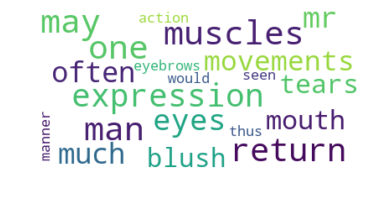

In [45]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud( background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42)
wordcloud.generate_from_frequencies(topNTerms_Emotions)

# Display the generated image:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() 

In [46]:
# LSA to create three concepts-- single concept for each book

from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(n_components=3, n_iter=100)
lsa.fit(X)

TruncatedSVD(algorithm='randomized', n_components=3, n_iter=100,
       random_state=None, tol=0.0)

In [47]:
# concept (rows) by terms (three columns) matrix that is part of decomposition can be
# accessed by lsa.components_[]

lsa.components_[0]

array([ 0.00200425,  0.00012308,  0.00012308, ...,  0.00012308,
        0.00012308,  0.00024616])

In [48]:
lsa.components_.shape

(3, 552738)

In [49]:
# print top 20 terms for each concept

terms = vectorizer.get_feature_names()
for i, comp in enumerate(lsa.components_):
    termsInComp = zip(terms,comp)
    sortedTerms= sorted(termsInComp, key=lambda x: x[1], reverse=True)[:20]
    print('Concept %d:' % i)
    for term in sortedTerms:
        print(term[0])
    print(' ')

Concept 0:
species
one
may
would
man
many
mr
male
animals
much
thus
two
see
selection
males
often
birds
case
female
certain
 
Concept 1:
muscles
return
expression
eyes
movements
tears
mouth
blush
eyebrows
man
face
mind
action
habit
seen
body
laughter
contraction
often
blushing
 
Concept 2:
male
males
female
sexes
females
man
birds
sexual
vol
colour
mr
colours
coloured
young
plumage
sexual selection
men
horns
sex
shewn
 
